In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("healthcare diabetes.csv")

# Data Exploration

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
positive = df[df['Outcome'] == 1]

In [8]:
positive.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [9]:
positive.shape

(268, 9)

Datatype of 'Pregnancies': int64


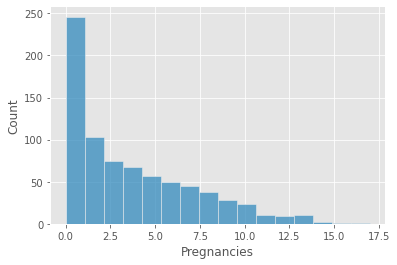

In [10]:
sns.histplot(df.Pregnancies);
print("Datatype of 'Pregnancies':", df['Pregnancies'].dtypes)

Datatype of 'Glucose': int64


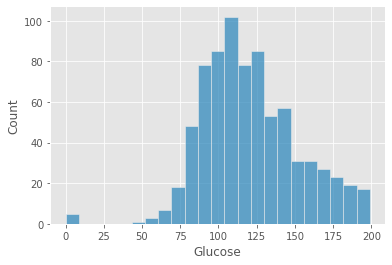

In [11]:
sns.histplot(df.Glucose);
print("Datatype of 'Glucose':", df['Glucose'].dtypes)

Datatype of 'BloodPressure': int64


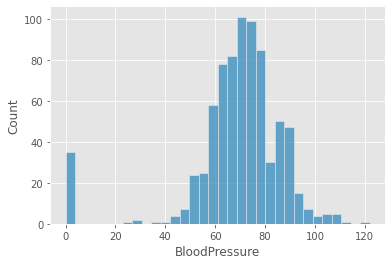

In [12]:
sns.histplot(df.BloodPressure);
print("Datatype of 'BloodPressure':", df['BloodPressure'].dtypes)

Datatype of 'SkinThickness': int64


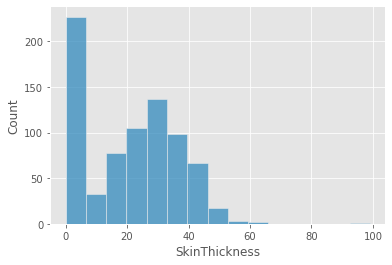

In [13]:
sns.histplot(df.SkinThickness);
print("Datatype of 'SkinThickness':", df['SkinThickness'].dtypes)

Datatype of 'Insulin': int64


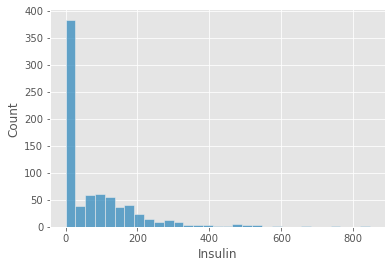

In [14]:
sns.histplot(df.Insulin);
print("Datatype of 'Insulin':", df['Insulin'].dtypes)

Datatype of 'BMI': float64


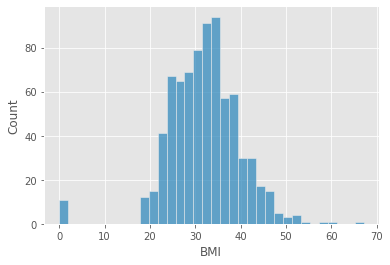

In [15]:
sns.histplot(df.BMI);
print("Datatype of 'BMI':", df['BMI'].dtypes)

Datatype of 'DiabetesPedigreeFunction': float64


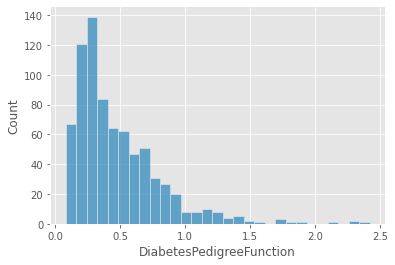

In [16]:
sns.histplot(df.DiabetesPedigreeFunction);
print("Datatype of 'DiabetesPedigreeFunction':", df['DiabetesPedigreeFunction'].dtypes)

Datatype of 'Age': int64


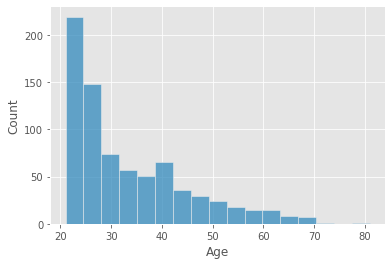

In [17]:
sns.histplot(df.Age);
print("Datatype of 'Age':", df['Age'].dtypes)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [19]:
zero_glucose = df[df['Glucose'] == 0]
zero_glucose

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [20]:
df.drop(zero_glucose.index.values, axis = 0, inplace = True)

In [21]:
zero_bloodpressure = df[df['BloodPressure'] == 0]
zero_bloodpressure

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [22]:
df.drop(zero_bloodpressure.index.values, axis = 0, inplace = True)

In [23]:
zero_skinthickness = df[df['SkinThickness'] == 0]
zero_skinthickness

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
11,10,168,74,0,0,38.0,0.537,34,1
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [24]:
df['SkinThickness'].mean()

21.388736263736263

In [25]:
df['SkinThickness'].median()

24.0

In [26]:
df['SkinThickness'].mode()

0    0
dtype: int64

In [27]:
df['SkinThickness'].replace(0, df['SkinThickness'].median(), inplace = True)

In [28]:
zero_insulin = df[df['Insulin'] == 0]
zero_insulin

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,24,0,23.3,0.672,32,1
5,5,116,74,24,0,25.6,0.201,30,0
9,8,125,96,24,0,0.0,0.232,54,1
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,24,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,24,0,30.1,0.349,47,1


In [29]:
df['Insulin'].mean()

84.15247252747253

In [30]:
df['Insulin'].median()

48.0

In [31]:
df['Insulin'].mode()

0    0
dtype: int64

In [32]:
df['Insulin'].replace(0, df['Insulin'].median(), inplace = True)

In [33]:
zero_bmi = df[df['BMI'] == 0]
zero_bmi

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,24,48,0.0,0.232,54,1
145,0,102,75,23,48,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
684,5,136,82,24,48,0.0,0.640,69,0


In [34]:
df.drop(zero_bmi.index.values, axis = 0, inplace = True)

In [35]:
df.shape

(724, 9)

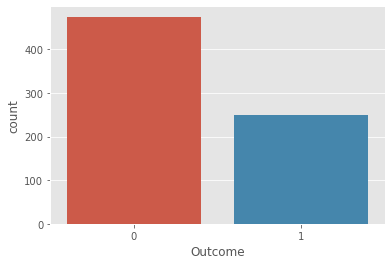

In [36]:
sns.countplot(x = 'Outcome', data = df);

The above plot conveys that both classes are balanced which means performing a sampling method is not needed. Hence this data can be directly used for training and testing purposes. Meanwhile during Model Validation , worrying about ROC Curve is also not needed because data is not imbalanced, but as this is a Medical data it is better to use ROC curve to make sure TYPE 2 ERROR is reduced.

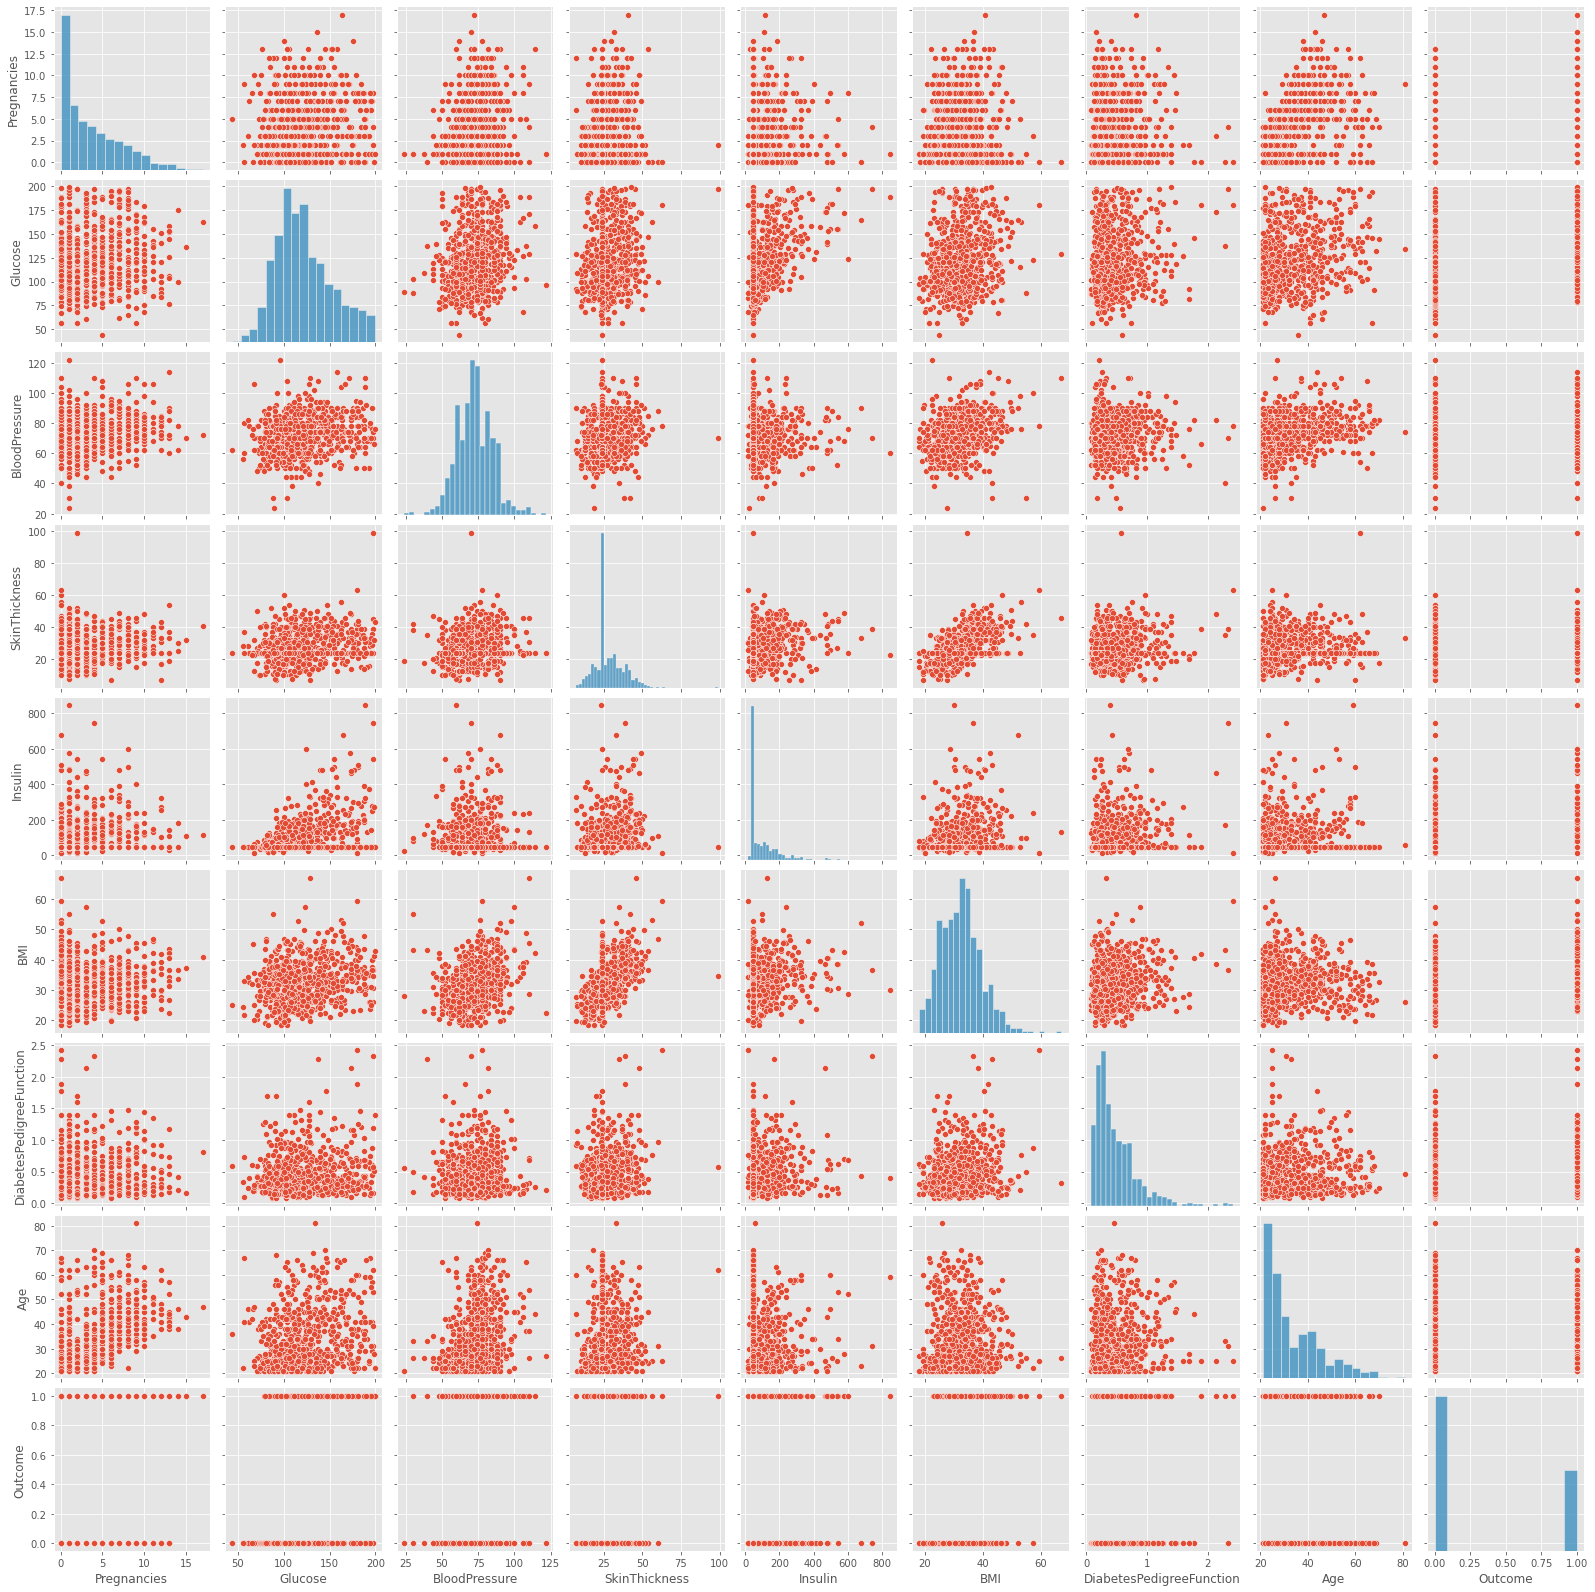

In [37]:
sns.pairplot(df);

The above scatter plot conveys that there is no strong multicollinearity among features, but between SkinThickness and BMI, Pregnancies and Age it seems like there is a small chance of positive correlation. A better understanding of this can be gained from the correlation analysis below.

In [38]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.134915,0.209668,0.035246,-0.048658,0.012342,-0.025996,0.557066,0.224417
Glucose,0.134915,1.000000,0.223331,0.178382,0.378975,0.223276,0.136630,0.263560,0.488384
BloodPressure,0.209668,0.223331,1.000000,0.157107,-0.017832,0.287403,-0.000075,0.324897,0.166703
SkinThickness,0.035246,0.178382,0.157107,1.000000,0.210922,0.562342,0.136950,0.062106,0.200386
Insulin,-0.048658,0.378975,-0.017832,0.210922,1.000000,0.195858,0.171353,-0.002755,0.172373
BMI,0.012342,0.223276,0.287403,0.562342,0.195858,1.000000,0.154858,0.020835,0.299375
DiabetesPedigreeFunction,-0.025996,0.136630,-0.000075,0.136950,0.171353,0.154858,1.000000,0.023098,0.184947
Age,0.557066,0.263560,0.324897,0.062106,-0.002755,0.020835,0.023098,1.000000,0.245741
Outcome,0.224417,0.488384,0.166703,0.200386,0.172373,0.299375,0.184947,0.245741,1.000000


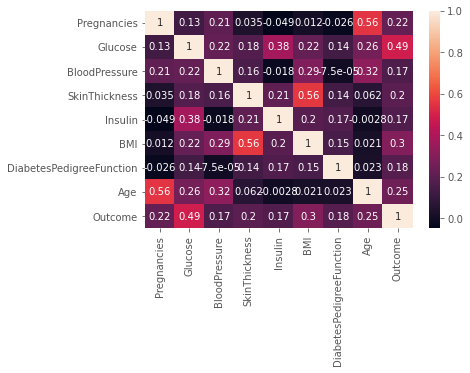

In [39]:
sns.heatmap(df.corr(), annot = True);

# Data Modelling

In [40]:
X = df.drop('Outcome', axis = 1)
y = df.Outcome

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

In [42]:
scale = StandardScaler()

X_train_std = scale.fit_transform(X_train)
X_test_std = scale.fit_transform(X_test)

norm = lambda a: (a - min(a)) / (max(a) - min(a))
df_norm = df.iloc[: , : -1]
df_normalized = df_norm.apply(norm)

In [43]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(df_normalized.values, y, test_size = 0.2, random_state = 24)

Data is mostly numerical and in such scenario, Logistic Regression works fine. It is already seen that variables are depending on target somewhat linearly, so this is also good for Logistic Regression. Support Vector Classifier, Random Forest Classifier(Ensemble Learning) can be applied later to see if accuracy can be improved. Note that these learning algorithms also work on linear data very well. Meanwhile confusion matrix and ROC will be used for accuracy.

## KNN

### KNN with Standard Scaling

In [44]:
knn_model = KNeighborsClassifier(n_neighbors = 25) 
knn_model.fit(X_train_std, y_train)
knn_pred = knn_model.predict(X_test_std)

Model Validation

Accuracy Score of KNN Model:
0.7448275862068966

 Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        93
           1       0.73      0.46      0.56        52

    accuracy                           0.74       145
   macro avg       0.74      0.68      0.69       145
weighted avg       0.74      0.74      0.73       145
 



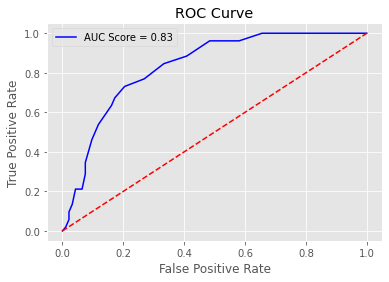

In [45]:
print("Model Validation\n")
print("Accuracy Score of KNN Model:")
print(metrics.accuracy_score(y_test, knn_pred))
print("\n", "Classification Report:")
print(metrics.classification_report(y_test, knn_pred), "\n")
knn_prob = knn_model.predict_proba(X_test_std)
knn_prob1 = knn_prob[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, knn_prob1)
roc_auc_knn = metrics.auc(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr, "b", label = "AUC Score = %0.2f" % roc_auc_knn)
plt.plot(fpr, fpr, "r--", color = "red")
plt.legend()

### KNN with Normalization 

In [46]:
knn_model_norm = KNeighborsClassifier(n_neighbors = 25) 
knn_model_norm.fit(X_train_norm, y_train_norm)
knn_pred_norm = knn_model_norm.predict(X_test_norm)

Model Validation

Accuracy Score of KNN Model with Normalization:
0.7379310344827587

 Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        93
           1       0.68      0.50      0.58        52

    accuracy                           0.74       145
   macro avg       0.72      0.69      0.69       145
weighted avg       0.73      0.74      0.73       145
 



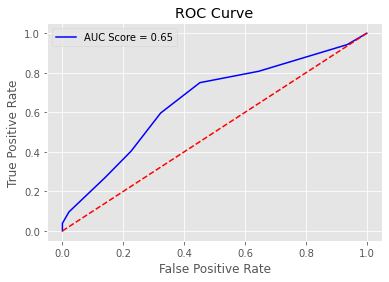

In [47]:
print("Model Validation\n")
print("Accuracy Score of KNN Model with Normalization:")
print(metrics.accuracy_score(y_test_norm, knn_pred_norm))
print("\n", "Classification Report:")
print(metrics.classification_report(y_test_norm, knn_pred_norm), "\n")
knn_prob_norm = knn_model.predict_proba(X_test_norm)
knn_prob_norm1 = knn_prob_norm[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test_norm, knn_prob_norm1)
roc_auc_knn = metrics.auc(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr,"b", label = "AUC Score = %0.2f" % roc_auc_knn)
plt.plot(fpr, fpr, "r--", color = "red")
plt.legend()

It is clearly shown that KNN with Standard Scaling is better than that with Normalization.

## Support Vector Classifier 

In [48]:
svc_model_linear = SVC(kernel = "linear", random_state = 0, probability = True, C = 0.01) 
svc_model_linear.fit(X_train_std, y_train)
svc_pred = svc_model_linear.predict(X_test_std)

Model Validation

Accuracy Score of SVC Model with Linear Kernel:
0.7586206896551724

 Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.94      0.83        93
           1       0.79      0.44      0.57        52

    accuracy                           0.76       145
   macro avg       0.77      0.69      0.70       145
weighted avg       0.77      0.76      0.74       145
 



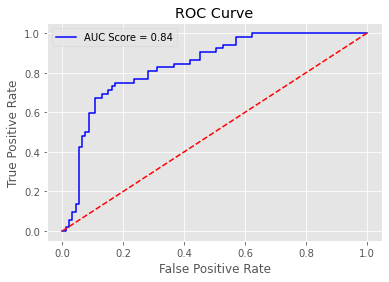

In [49]:
print("Model Validation\n")
print("Accuracy Score of SVC Model with Linear Kernel:")
print(metrics.accuracy_score(y_test, svc_pred))
print("\n", "Classification Report:")
print(metrics.classification_report(y_test,svc_pred), "\n")
svc_prob_linear = svc_model_linear.predict_proba(X_test_std)
svc_prob_linear1 = svc_prob_linear[:, 1]
fpr,tpr,thresh = metrics.roc_curve(y_test, svc_prob_linear1)
roc_auc_svc = metrics.auc(fpr, tpr) 
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr, "b", label = "AUC Score = %0.2f" % roc_auc_svc)
plt.plot(fpr, fpr, "r--", color = "red")
plt.legend()

Comparison of SVC with KNN: SVC is better than KNN in both accuracy and AUC score.

## Logistic Regression 

In [50]:
lr_model = LogisticRegression(C = 0.01) 
lr_model.fit(X_train_std, y_train)
lr_pred = lr_model.predict(X_test_std)

Model Validation

Accuracy Score of Logistic Regression Model:
0.7586206896551724

 Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.94      0.83        93
           1       0.79      0.44      0.57        52

    accuracy                           0.76       145
   macro avg       0.77      0.69      0.70       145
weighted avg       0.77      0.76      0.74       145
 



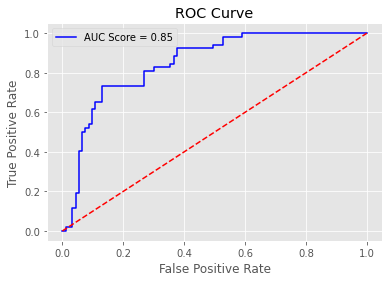

In [51]:
print("Model Validation\n")
print("Accuracy Score of Logistic Regression Model:")
print(metrics.accuracy_score(y_test, lr_pred))
print("\n", "Classification Report:")
print(metrics.classification_report(y_test, lr_pred), "\n")
lr_prob = lr_model.predict_proba(X_test_std)
lr_prob1 = lr_prob[:, 1]
fpr,tpr,thresh = metrics.roc_curve(y_test, lr_prob1)
roc_auc_lr = metrics.auc(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr, "b", label = "AUC Score = %0.2f" % roc_auc_lr)
plt.plot(fpr, fpr, "r--", color = "red")
plt.legend()

Comparison of Logistic Regression with KNN: Logistic Regression is better than KNN in both accuracy and AUC score.

## Random Forest Classifier

In [52]:
rf_model = RandomForestClassifier(n_estimators = 1000, random_state = 0)
rf_model.fit(X_train_std, y_train)
rf_pred = rf_model.predict(X_test_std)

Model Validation

Accuracy Score of Logistic Regression Model:
0.7517241379310344

 Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        93
           1       0.71      0.52      0.60        52

    accuracy                           0.75       145
   macro avg       0.74      0.70      0.71       145
weighted avg       0.75      0.75      0.74       145
 



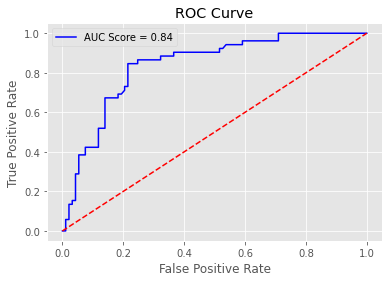

In [53]:
print("Model Validation\n")
print("Accuracy Score of Logistic Regression Model:")
print(metrics.accuracy_score(y_test, rf_pred))
print("\n", "Classification Report:")
print(metrics.classification_report(y_test, rf_pred), "\n")
rf_prob = rf_model.predict_proba(X_test_std)
rf_prob1 = rf_prob[:, 1]
fpr,tpr,thresh = metrics.roc_curve(y_test, rf_prob1)
roc_auc_rf = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, "b", label = "AUC Score = %0.2f" % roc_auc_rf)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, fpr, "r--", color = "red")
plt.legend()

Comparison of RFC with KNN: RFC is better than KNN in both accuracy and AUC score. Infact, RFC is the best among all the above used algorithms for model building.

In [55]:
df.to_excel("healthcare diabetes modified.xls", index = False)